# Annual

# Make Sure the modules are installed



# Import modules

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [27]:
!pwd

/home/gdillon/JupyterPractice/graffiti_SF311


# Compared to other years

In [29]:
url = 'https://data.sfgov.org/resource/qer8-n8u9.csv?$select=date_trunc_y(opened)as%20year,%20count(*)&$order=year&$group=year'

In [53]:
df = pd.read_csv(url)
df

,year,count
0,01/01/2008 12:00:00 AM,8931
1,01/01/2009 12:00:00 AM,32285
2,01/01/2010 12:00:00 AM,26769
3,01/01/2011 12:00:00 AM,25445
4,01/01/2012 12:00:00 AM,26254
5,01/01/2013 12:00:00 AM,35831
6,01/01/2014 12:00:00 AM,46808
7,01/01/2015 12:00:00 AM,57249
8,01/01/2016 12:00:00 AM,69765


In [85]:
y = df['count'].tolist()
y = y[1:]
y

[32285, 26769, 25445, 26254, 35831, 46808, 57249, 69765]

In [89]:
x = ['2009','2010','2011','2012','2013','2014','2015','2016']

<Container object of 8 artists>

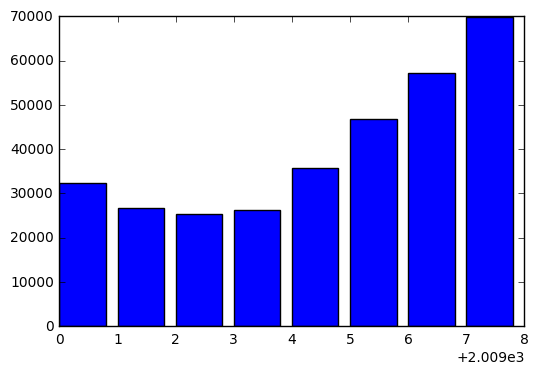

In [90]:
import matplotlib.pyplot as plt

#x = [1,2,3,4,5,6,7,8]
#x = ['2008','2009','2010','2011','2012','2013','2014','2015','2016']

#N = len(y)
#x = range(N)
#width = 1/1.5
plt.bar(x, y )




In [33]:
df.to_datetime()

AttributeError: 'DataFrame' object has no attribute 'to_datetime'

In [13]:
!date -d "1 week ago 13:00" '+%Y-%m-%d'

2016-12-06


This year and last year work

In [14]:
annum = !date -d "this year 13:00" '+%Y-01-01'
onorafter = str(annum)[1:-1]

In [15]:
print(onorafter)

'2016-01-01'


## deal with the limits of Socrata

In [16]:
#All Graffiti Currently Set for one year, but limit is 50, 000
'''
https://data.sfgov.org/resource/rme2-xgvs.json
https://data.sfgov.org/resource/rme2-xgvs.json
The graffiti_url is the target URL
and could be swapped out, and the code should still run
'''
graffiti_url = 'https://data.sfgov.org/resource/rme2-xgvs.json'
target_url=graffiti_url

In [17]:
url0 = str(target_url)[:-4]+'csv'
url0

'https://data.sfgov.org/resource/rme2-xgvs.csv'

In [18]:

limit = '?$limit=50000'
offset = '&$offset=50000'
url1 = url0+limit
print (url1)

url2 = url1 + offset
print (url2)

https://data.sfgov.org/resource/rme2-xgvs.csv?$limit=50000
https://data.sfgov.org/resource/rme2-xgvs.csv?$limit=50000&$offset=50000


In [19]:
print(url2)
where = '&$where='
category = 'opened'
start = '>='

#date format 'year-mm-dd'
#onorafterdate = "'2016-12-09'"
url2 = url2 + where + category + start + str(onorafter) 
print(url2)

https://data.sfgov.org/resource/rme2-xgvs.csv?$limit=50000&$offset=50000
https://data.sfgov.org/resource/rme2-xgvs.csv?$limit=50000&$offset=50000&$where=opened>='2016-01-01'


# Concatenate or Vertically stack the two dataFrames

In [20]:
df1  = pd.read_csv(url1)
df2 = pd.read_csv(url2)

In [21]:
frames = [df1,df2]

In [22]:
df = pd.concat(frames)

In [23]:
df.shape

(69765, 16)

In [14]:
df.head(2)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6615857,12/11/2016 12:18:04 AM,NaN,12/11/2016 12:18:04 AM,Open,open,DPW Ops Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,City_receptacle - Not_Offensive,Intersection of LEAVENWORTH ST and OFARRELL ST,6.0,Tenderloin,"(37.7855825352246, -122.414617250961)",Open311,NaN
1,6615854,12/11/2016 12:15:59 AM,NaN,12/11/2016 12:15:59 AM,Open,Open,US Postal Service Maintenance Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Mail_box - Not_Offensive,Intersection of LEAVENWORTH ST and OFARRELL ST,6.0,Tenderloin,"(37.7855825352246, -122.414617250961)",Open311,NaN


In [15]:
df.tail(1)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
19374,5421825,01/01/2016 01:59:36 AM,03/25/2016 03:07:10 PM,03/25/2016 03:07:10 PM,Closed,Case Resolved -,SFMTA - Muni System Feedback Queue,Graffiti Public Property,Offensive Graffiti on Public Property,Other_enter_additional_details_below - Offensive,"501 YORK ST, SAN FRANCISCO, CA, 94110",10.0,Mission,"(37.762920097989, -122.409087128107)",Open311,http://mobile311.sfgov.org/media/san_francisco...


# Convert the time series into pandas time version

In [16]:
df.columns

Index(['CaseID', 'Opened', 'Closed', 'Updated', 'Status', 'Status Notes',
       'Responsible Agency', 'Category', 'Request Type', 'Request Details',
       'Address', 'Supervisor District', 'Neighborhood', 'Point', 'Source',
       'Media URL'],
      dtype='object')

In [17]:
timeCols = ['Opened', 'Closed', 'Updated']

# Consider some exploratory statistics / reality checks

In [18]:
source = df.Source.value_counts()
print(type(source))


print(source)

<class 'pandas.core.series.Series'>
Open311              52787
Integrated Agency     7823
Web Self Service      4402
Voice In              4172
Twitter                191
Name: Source, dtype: int64


In [19]:
type(source)

pandas.core.series.Series

In [21]:
label_list = source.index.tolist()
print(label_list)

['Open311', 'Integrated Agency', 'Web Self Service', 'Voice In', 'Twitter']


In [22]:
source = source.tolist()
source


[52787, 7823, 4402, 4172, 191]

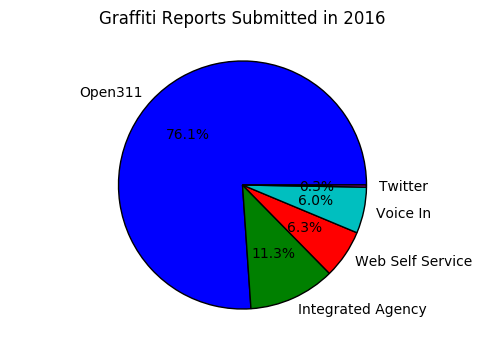

In [23]:


plt.axis("equal")
plt.pie(
        source,
        labels=label_list,
        autopct="%1.1f%%"
        )
plt.title("Graffiti Reports Submitted in 2016")
plt.show()

In [28]:
df['Supervisor District'].value_counts().head(11)

9.0     13190
3.0     11506
5.0     11358
6.0      9314
8.0      8286
1.0      4567
10.0     3792
2.0      2260
11.0     1759
4.0      1322
7.0      1242
Name: Supervisor District, dtype: int64

# Get list of Supervisor's'

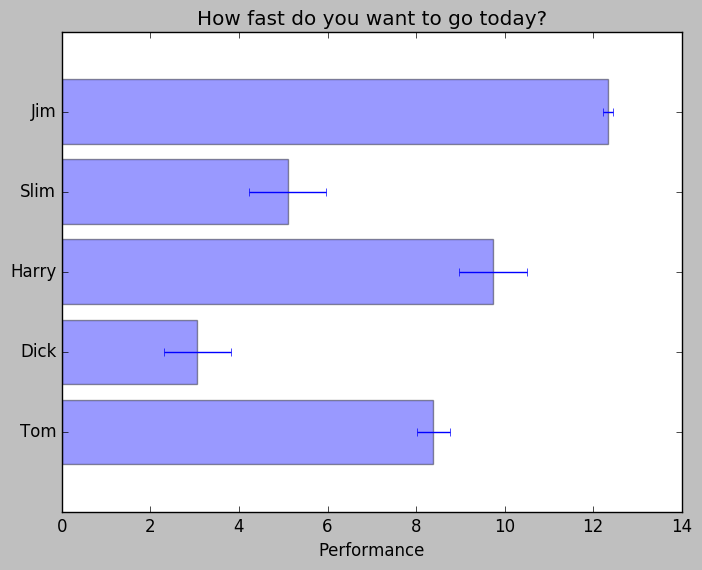

In [27]:

plt.rcdefaults()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

plt.barh(y_pos, performance, xerr=error, align='center', alpha=0.4)
plt.yticks(y_pos, people)
plt.xlabel('Performance')
plt.title('How fast do you want to go today?')

plt.show()

ValueError: incompatible sizes: argument 'height' must be length 1 or scalar

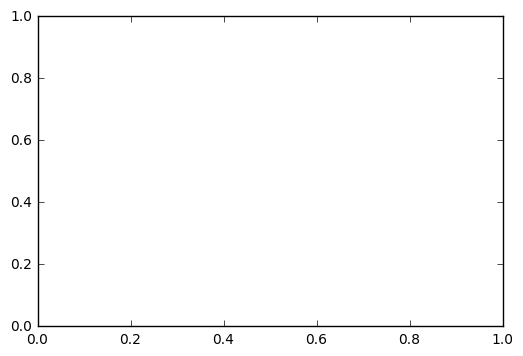

In [26]:

fig, ax = plt.subplots(1)
np.random.seed(14)
n = 10
plt.bar(ax, np.arange(n), np.abs(np.random.randn(n)), annotate=True, grid='y')
fig.savefig('bar_prettyplotlib_grid_annotated.png')

In [ ]:
df['Status Notes'].value_counts().head(10)

In [ ]:
df['Status'].value_counts().head()

In [ ]:
df['Responsible Agency'].value_counts().head(4)

In [ ]:
df.Category.value_counts().head()

In [ ]:
df['Request Type'].value_counts().head(10)

In [ ]:
df['Request Details'].value_counts().head(20)

In [ ]:
df['Address'].value_counts().head(20)

In [ ]:
df['Source'].value_counts().head(6)

In [ ]:
df['Media URL'].describe()

In [ ]:
df['Point'].describe()

# Plot this.    Simple First


In [ ]:
#Plot by top responsible agency that is not DPW

In [ ]:
!pwd

In [ ]:
!ls

In [ ]:
!cat geocoded.csv

# Start Plotting the simple items

# Plot Responsible Agency non DPW

In [ ]:
respAgencyCount = df['Responsible Agency'].value_counts()

In [ ]:
respAgencyCount = respAgencyCount[1:27]

In [ ]:
respAgencyCount

## minimally acceptable is to do pie / dpw vs all other
### DPW share compared to prior years
### Conclude, DPW doing a good job, how about the other departments
### Bar Chart the top 5-6
### Which of the top 5-6 are doing better.
### can't give the most natural statistic, because 